<h3>Import Statements</h3>

In [ ]:
import os

os.system(f"pip install -r {os.path.abspath(os.getcwd())}/requirements.txt")

In [9]:
import tensorflow as tf
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib
import matplotlib.pyplot as plt

from datasets import dataset

<h3>Loading in training data</h3>

In [10]:
temp_train = np.asarray(dataset['Temperature'])
rh_train = np.asarray(dataset['RH'])
wind_train = np.asarray(dataset['Ws'])
rain_train = np.asarray(dataset['Rain'])

### Obtaining the x_train and y_train data ###

In [11]:
xData = np.column_stack((temp_train, rh_train, wind_train, rain_train))
yData = np.asarray(dataset['Classes'].apply(lambda x: 1 if x == 'fire' else 0))

x_train, x_test, y_train, y_test = train_test_split(xData, yData, test_size=0.25)

### Defining model layers and creating the model ###

In [12]:
input_shape = x_train.shape[1:]
inputs = Input(shape=input_shape)
x = Dense(32, activation='relu', kernel_regularizer='l1')(inputs)
x = Dropout(0.2)(x)
x = Dense(16, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

### Define the optimizer

In [13]:
optimizer = tf.keras.optimizers.Adam(
	learning_rate=0.001,
	beta_1=0.9,
	beta_2=0.999,
	epsilon=1e-07
)

### Compiling, training, and evaluating the model

In [14]:
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0) # Verbose = 0 for minimal output
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
5/5 [==============================] - 1s 52ms/step - loss: 8.3098 - accuracy: 0.1301 - val_loss: 5.2811 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 10ms/step - loss: 4.5212 - accuracy: 0.3973 - val_loss: 0.7336 - val_accuracy: 0.7568
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 2.6738 - accuracy: 0.6712 - val_loss: 0.2509 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 9ms/step - loss: 1.6268 - accuracy: 0.7671 - val_loss: 0.2445 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 1.2321 - accuracy: 0.8425 - val_loss: 0.2421 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 11ms/step - loss: 1.2037 - accuracy: 0.8356 - val_loss: 0.2398 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.8083 - accuracy: 0.8904 - val_loss: 0.2373 - val_accuracy: 1.0000
Epoch 8/10
5/5 [========

### Visualizing results

Epoch 1/10
5/5 [==============================] - 0s 20ms/step - loss: 0.7935 - accuracy: 0.9658 - val_loss: 0.2276 - val_accuracy: 1.0000
Epoch 2/10
5/5 [==============================] - 0s 9ms/step - loss: 0.7758 - accuracy: 0.9726 - val_loss: 0.2251 - val_accuracy: 1.0000
Epoch 3/10
5/5 [==============================] - 0s 18ms/step - loss: 0.7244 - accuracy: 0.9658 - val_loss: 0.2226 - val_accuracy: 1.0000
Epoch 4/10
5/5 [==============================] - 0s 10ms/step - loss: 0.7693 - accuracy: 0.9521 - val_loss: 0.2202 - val_accuracy: 1.0000
Epoch 5/10
5/5 [==============================] - 0s 10ms/step - loss: 0.8554 - accuracy: 0.9521 - val_loss: 0.2178 - val_accuracy: 1.0000
Epoch 6/10
5/5 [==============================] - 0s 10ms/step - loss: 0.6811 - accuracy: 0.9589 - val_loss: 0.2156 - val_accuracy: 1.0000
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.8485 - accuracy: 0.9589 - val_loss: 0.2135 - val_accuracy: 1.0000
Epoch 8/10
5/5 [============

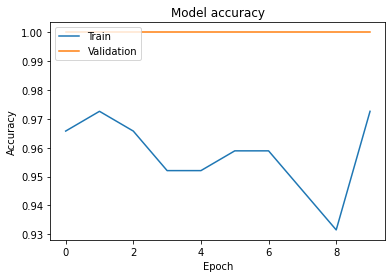

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()